In [1]:
import time
start = time.time()

# Support Vector Machines - Exemplo 001

Neste exemplo utilizaremos SVM sem "balanceamento de classes" e "sem validação cruzada" para facilitar o Processo de Desenvolvimento de Machine Learning.

# Processo para o Desenvolvimento de Machine Learning

Vamos iniciar pelo que podemos chamar de clico de vida de ML, ou seja, utilizaremos essa "Big Picture" como guia.

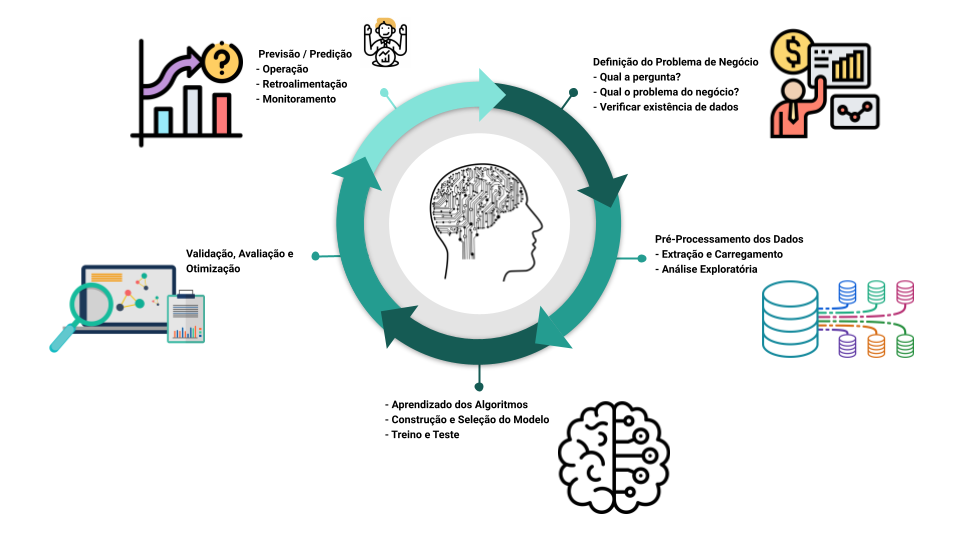

In [2]:
from IPython.display import Image
Image('Processo.png')

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
import sklearn as sl
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

## Definição do Problema de Negócio

## Pré-Processamento dos Dados

### Extração e Carregamento

In [6]:
import pandas as pd
data=pd.read_csv('spam.csv')
data.rename(columns={'v1':'Label','v2':'EmailText'},inplace=True)

### Análise Exploratória

In [7]:
# Visualizando as primeiras 10 linhas
print(data.head(10))

  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


#### Estatística Descritiva

In [8]:
# Visualizando as dimensões
data.shape

(5572, 2)

In [9]:
# Tipo de dados de cada atributo
data.dtypes

Label        object
EmailText    object
dtype: object

In [10]:
# Sumário estatístico
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Verificando se a variável resposta está balanceada

In [12]:
target_count = data.Label.value_counts()
target_count

Label
ham     4825
spam     747
Name: count, dtype: int64

## Aprendizado dos Algoritmos

### Classificação utilizando Support Vector Machines - Sem Balanceamento de Classes

#### Separar os dados em Treino e Teste

(test_size = .02) ou seja, 20% para teste

(random_state=0) para assegurar os mesmos valores em todas as vezes.

In [13]:
X = data['EmailText'].values
y = data['Label'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#### Convertendo texto em integer

In [15]:
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Definição do algoritmo

In [16]:
modeloSVM = SVC(kernel = 'rbf', random_state = 0, probability=True)

#### Treinamento do modelo usando dataset de treino

In [17]:
modeloSVM.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## Validação, Avaliação e Otimização

#### Gerando as predições usando a base de teste (validação)

In [18]:
modeloSVM_preds = modeloSVM.predict(X_test)

### Gerando Matriz de Confusão

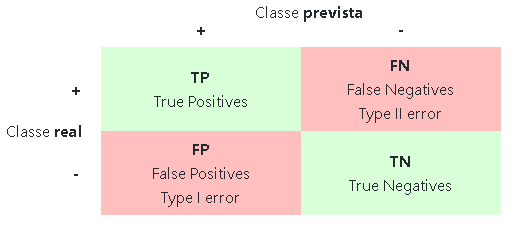

In [19]:
from IPython.display import Image
Image('matrix3.png')

In [20]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=modeloSVM_preds)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[949   0]
 [ 26 140]]


### Principais Métricas

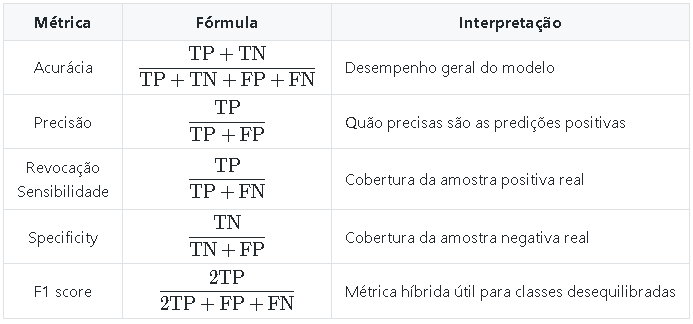

In [22]:
from IPython.display import Image
Image('metricas.png')

In [23]:
TP = int(conf_mat[0,0])
FN = int(conf_mat[0,1])
FP = int(conf_mat[1,0])
TN = int(conf_mat[1,1])

In [24]:
Acurária = (TP + TN) / (TP + TN + FP + FN)
Acurária

0.9766816143497757

In [25]:
Precisão = TP / (TP + FP)
Precisão

0.9733333333333334

In [26]:
Recall = TP / (TP + FN)
Recall

1.0

In [27]:
Specificity = TN / (TN + FP)
Specificity

0.8433734939759037

In [28]:
F1_Score = (2 * TP) / (2 * TP + FP + FN)
F1_Score

0.9864864864864865

### Serializar os resultados do Modelo

In [29]:
end = time.time()
tempo = ((end - start)/60)

In [30]:
import csv
# field names 
fields = ['Modelo', 'Acurácia', 'Precisão', 'Recall', 'Specificity', 'F1 Score', 'Tempo em Segundo'] 
    
# data rows of csv file 
rows = [['SVM', Acurária, Precisão, Recall, Specificity, F1_Score, tempo ] ]
  
with open('resultados.csv', 'a') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(rows)

    # Close the file object
    f.close()